In [12]:
using SparseArrays, LinearAlgebra, IndexedGraphs
#using Pkg
#Pkg.activ§ate("../")
using Causality
using Plots

# Generation of Epidemics

In [13]:
T, N = 20.0, 10000
#G = Causality.makeBarabasi(N,k=2)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeGNP(N,4.6/N)
#=A = [0 0 0 1 0;
     0 0 0 0 1;
     0 0 0 0 0;
     0 0 1 0 0;
     0 0 1 0 0]=#
#G = IndexedBiDiGraph(A)

{10000, 45672} directed sparse Int64 graph
⣫⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

In [14]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [15]:
#Initialize generation parameters
ε = 1e-10
λ = 0.1
pseed = 1e-3
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, T/2, 1/ε)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [16]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

inf_min = GaussianRate(ε  ,  -T,   ε)
inf_max = GaussianRate(1/ε  ,  2T, 1. )

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [17]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

0.4847


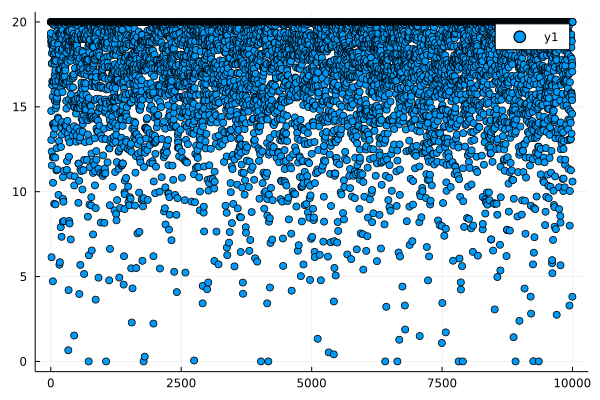

In [18]:
V = fill(MaskedRate(UnitRate(),Causality.intervalUnion(0,T)), ne(G));
Mp = StochasticModel(Igen, T, θp, G, θpgen, V);
sample! = Sampler(Mp);
xtrue = zeros(N)
ni = 0
sample!(xtrue)
#=while !(0.45 < ni < 0.55)
    sample!(xtrue)
    ni = sum(xtrue .< T)/N
end=#
println(sum(xtrue .< T)/N)
scatter(xtrue)
#scatter!(xtrue .+ 1)
#scatter!(xtrue .- 1)

In [20]:
nobs, p = 500, 1e-5 #p is mute
O = [(ti = T; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
#f_rate = 1e-5
#O=[rand()< f_rate ? (o[1],!o[2],o[3],f_rate) : (o[1],o[2],o[3],f_rate) for o in O]

500-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 20.0, 1.0e-5)
 (2, 0, 20.0, 1.0e-5)
 (3, 1, 20.0, 1.0e-5)
 (4, 0, 20.0, 1.0e-5)
 (5, 0, 20.0, 1.0e-5)
 (6, 0, 20.0, 1.0e-5)
 (7, 0, 20.0, 1.0e-5)
 (8, 1, 20.0, 1.0e-5)
 (9, 1, 20.0, 1.0e-5)
 (10, 1, 20.0, 1.0e-5)
 (11, 0, 20.0, 1.0e-5)
 (12, 0, 20.0, 1.0e-5)
 (13, 1, 20.0, 1.0e-5)
 ⋮
 (489, 1, 20.0, 1.0e-5)
 (490, 1, 20.0, 1.0e-5)
 (491, 0, 20.0, 1.0e-5)
 (492, 0, 20.0, 1.0e-5)
 (493, 1, 20.0, 1.0e-5)
 (494, 0, 20.0, 1.0e-5)
 (495, 1, 20.0, 1.0e-5)
 (496, 0, 20.0, 1.0e-5)
 (497, 1, 20.0, 1.0e-5)
 (498, 1, 20.0, 1.0e-5)
 (499, 1, 20.0, 1.0e-5)
 (500, 1, 20.0, 1.0e-5)

## Causality 

In [21]:
#Softened model
T = Float64(T)
ε = 2e-3
autoinf = GaussianRate(ε, T/2, T);
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen, V);

In [22]:
θ = getpar(pseed, autoinf, inf_in);
autoinf = GaussianRate(1., T/2, T);
M = StochasticModel(Igauss, T, θ, G, θp2gen, V);

In [11]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.));
F = descend!(Mp2, O; M=M, numsamples=500, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03),
         hyperdescender=SignDescender(0.));

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31
  F:  18.86849682160132


In [23]:
statscau = prior(M, numsamples=1000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


# Local Causality

In [95]:
#Softened model
T = Float64(T)
ε = 2e-3
autoinf = GaussianRate(ε, T/2, T);
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen, V);

In [96]:
θ = getpar(pseed, autoinf, inf_in);
autoinf = GaussianRate(1., T/2, T);
M = StochasticModel(Igauss, T, θ, G, θp2gen, V);

In [97]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = localdescend!(Mp2, O; M=M, numsamples=500, numiters=50, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.));
F = localdescend!(Mp2, O; M=M, numsamples=500, numiters=50, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03),
         hyperdescender=SignDescender(0.));

Progress: 100%|█████████████████████████████████████████| Time: 0:29:35
  F:  617.6070720028558


In [98]:
statscauLoc = prior(M, numsamples=3000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:38


## SoftMarg

In [99]:
Osoft = [(o[1],o[2],o[3],max(0.05,p)) for o in O]

500-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 20.0, 0.05)
 (2, 0, 20.0, 0.05)
 (3, 1, 20.0, 0.05)
 (4, 0, 20.0, 0.05)
 (5, 1, 20.0, 0.05)
 (6, 0, 20.0, 0.05)
 (7, 0, 20.0, 0.05)
 (8, 0, 20.0, 0.05)
 (9, 1, 20.0, 0.05)
 (10, 1, 20.0, 0.05)
 (11, 1, 20.0, 0.05)
 (12, 1, 20.0, 0.05)
 (13, 0, 20.0, 0.05)
 ⋮
 (489, 1, 20.0, 0.05)
 (490, 1, 20.0, 0.05)
 (491, 1, 20.0, 0.05)
 (492, 0, 20.0, 0.05)
 (493, 0, 20.0, 0.05)
 (494, 1, 20.0, 0.05)
 (495, 0, 20.0, 0.05)
 (496, 1, 20.0, 0.05)
 (497, 0, 20.0, 0.05)
 (498, 1, 20.0, 0.05)
 (499, 0, 20.0, 0.05)
 (500, 1, 20.0, 0.05)

In [100]:
stats, weights = softpostnoise(Mp, Osoft; numsamples=5 * 10^4);

Progress: 100%|█████████████████████████████████████████| Time: 0:11:20


## Sib

In [101]:
using PyCall
@pyimport sib
function sibyl(N, T_cont, Λ, O, γ, λ ; dt=1/5, maxit = 400, tol = 1e-14)
    
    T = Int(round(T_cont / dt))
    contacts = [(i-1,j-1,t, λ * dt) for t in 1:T for (j,i,v) in zip(findnz(Λ.A)...)];
    obs = [[(i,-1,t) for t=1:T for i=0:N-1];
           [(i-1,s,Int(round(t/dt))) for (i,s,t,p) in O]]
    sort!(obs, lt=((i1,s1,t1),(i2,s2,t2))->(t1<t2))
    prob_sus = 0.5
    prob_seed=γ
    pseed = prob_seed / (2 - prob_seed)
    psus = prob_sus * (1 - pseed)
    params = sib.Params(prob_r=sib.Exponential(mu=0), pseed=pseed, psus=psus,pautoinf=0,fp_rate=0,fn_rate=0)
    f = sib.FactorGraph(contacts=contacts, observations=obs, params=params)
    sib.iterate(f, maxit=maxit,tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.5, tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.9, tol=tol)
    p_sib=[collect(n.bt) for n in f.nodes]
    m_sib = zeros(N, T)
    for i=1:N
        m_sib[i,1] = p_sib[i][1] 
        for t=2:T
            m_sib[i,t] = m_sib[i,t-1] + p_sib[i][t]
        end
    end 
    return m_sib
end


sibyl (generic function with 1 method)

In [ ]:
a=time()
dt = 1/4
p_sib = sibyl(N, T, G, O, pseed, λ; dt=dt, maxit = 20, tol = 1e-7);
b=time()
println(b-a)

# Heuristic

In [ ]:
using IntervalUnionArithmetic
T = Float64(T)
struct HeuristicSI <: SI end
θp2gen = getpargen(pseed, autoinf, inf_out);
maskauto = fill(intervalUnion(0., T),N)
maskinf = fill(intervalUnion(0., T),N)
θfrench = getpar(pseed, autoinf, inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)
inf_start_time = T * ones(N)
for o in O
    if o[2] == 1
        inf_start_time[o[1]] = min(inf_start_time[o[1]], o[3] - 5)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3]-5, T)       
        θfrench[2,o[1]] = 10^10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 100 * T
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ intervalUnion(o[3], T)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end
for i=1:N
    if inf_start_time[i] != T 
        maskauto[i] = maskauto[i] ∩ intervalUnion(inf_start_time[i], T)
    end
end
Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen);
statsfre = prior(Mfrench,numsamples=10000); 

In [ ]:
function MF_heu(N, T_cont, Λ, O, γ, λ ; dt=1/5, maxit = 400)
    T = Int(round(T_cont / dt))
    p_MF = zeros(N,T) #prob to be S
    p_MF[:,1] .= 1 - γ 
    obs_I = [o[1] for o in O if o[2] == 1]
    obs_S = [o[1] for o in O if o[2] == 0]
    for st = 1:maxit
        for t = 2:T
            for i = 1:N
                p_MF[i,t] = p_MF[i,t-1]
                for j in collect(Causality.outedges(Λ,1))
                    p_MF[i,t] *= 1 - λ*(1 - p_MF[j.dst,t-1])
                end
                if i in obs_I                    
                    o = O[i]
                    p_MF[i, Int(round((o[3]-5)/dt)) : end] .= 0
                end
                if i in obs_S
                    o = O[i]
                    p_MF[i, 1 : Int(round(o[3]/dt))] .= 1
                end
            end
        end
    end
    return 1 .- p_MF
end

In [ ]:
p_MF = MF_heu(N, T, G, [], 1/N, λ ; dt=dt, maxit = 100)

## Metropolis Monte Carlo

In [ ]:
K =  Causality.RectifiedGaussMove(4.0)
#stats_mh = Causality.metropolis_sampling_parallel(Mp, O, K; numsamples = 10^3,numsteps=10^3)
stats_mh = Causality.metropolis_sampling_sequential(Mp, O, K; numsamples = 5*10^4,numsteps=1,nfirst = 10^3);


## Marginals and ROC curve

In [ ]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function reweighted_marginal(i, t, stats, weights)
    numsamp = size(stats,1)
    @assert numsamp == size(weights,1)
    weights ./= maximum(weights)
    sum(weights .* (stats[:,i] .< t))/sum(weights)
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

In [ ]:
#Marginals
bins = 2 * Int(T)
using Plots
p_cau = zeros(N,bins)
p_cauLoc = zeros(N,bins)
p_french = zeros(N,bins)
p_mh = zeros(N,bins)
p_soft = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_cauLoc[i,t] = marginal(i, t*T/bins, statscauLoc)
       p_french[i,t] = marginal(i, t*T/bins, statsfre)
       p_mh[i,t] = marginal(i, t*T/bins, stats_mh)
       p_soft[i,t] = reweighted_marginal(i, t*T/bins, stats, weights)
    end
end

In [ ]:
M.θ[2,3]

In [ ]:
O

In [ ]:
i = 3
plot(LinRange(1,Int(T),bins),p_cau[i,:], label = "cau")
#plot!(LinRange(1,Int(T),bins),p_french[i,:], label = "french")
#plot!(LinRange(1,Int(T),bins),p_soft[i,:], label = "soft")
#plot!(LinRange(1,Int(T),bins),p_mh[i,:], label = "MH")
plot!(LinRange(1,Int(T),Int(round(T/dt))),p_sib[i,:], label = "sib")
#plot!(LinRange(1,Int(T),Int(round(T/dt))),p_MF[i,:], label = "MF")
ylims!(-0.001,1)

In [ ]:
#AUROC curves

T = Int(T)
AU_curve=zeros(T)
AU_curveLoc=zeros(T)
AU_sib=zeros(T)
AU_MF=zeros(T)
AU_french = zeros(T)
AU_soft = zeros(T)
AU_MH = zeros(T)
for t = 1:T
    cau_risk=zeros(N)
    cau_riskLoc=zeros(N)
    sib_risk = zeros(N)
    MF_risk = zeros(N)
    french_risk = zeros(N)
    MH_risk = zeros(N)
    soft_risk = zeros(N)
    for i=1:N
       cau_risk[i] = marginal(i,t,statscau)
        cau_riskLoc[i] = marginal(i,t,statscauLoc)
       french_risk[i] = marginal(i,t,statsfre)
       MH_risk[i] = marginal(i,t,stats_mh)
       sib_risk[i] = p_sib[i,Int(round(t/dt))]
        MF_risk[i] = p_MF[i,Int(round(t/dt))]
       soft_risk[i] = reweighted_marginal(i, t*T/bins, stats, weights)
    end
    xt = xtrue .< t
    AU_soft[t] = AUROC(ROC(xt, soft_risk))
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_curveLoc[t] = AUROC(ROC(xt, cau_riskLoc))
    AU_french[t] = AUROC(ROC(xt, french_risk))
    AU_MH[t] = AUROC(ROC(xt, MH_risk))
    AU_sib[t] = AUROC(ROC(xt, sib_risk))
    AU_MF[t] = AUROC(ROC(xt, MF_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUCau", title="Causality VS Sib AUROC in function of time")
scatter!(LinRange(1,T,T),AU_soft, label="AUSoft",legend=:bottomleft)
plot!(LinRange(1,T,T),AU_french, label="AUFrench")
scatter!(LinRange(1,T,T),AU_MH, label="AUMH")
plot!(LinRange(1,T,T),AU_curveLoc, label="Loc")
scatter!(LinRange(1,T,T), AU_sib, label="AUsib")
scatter!(LinRange(1,T,T), AU_MF, label="AUMF",legend=:top)
xlabel!("t")
ylabel!("AUROC")
#savefig("confronti.pdf")
#ylims!(0.5,1.01)